# Analysis Notebook

## Package imports and configurations

In [1]:
# imports
import os

from pathlib import Path

import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

from rich import print
from tqdm import tqdm

In [2]:
# matplotlib configuration
cstyle_url = r"https://gist.githubusercontent.com/CalvinSprouse/30bba681da1dd0023e948ca207fad0fc/raw/80a1ae94031873a57c9624103e83f5caf175ac86/cstyle.mplstyle"
plt.style.use(["default", cstyle_url])

# configure figure directory
figure_dir = Path(".figures")
if not figure_dir.exists(): figure_dir.mkdir()

## Data loading and initial processing

In [3]:
# define the location of data files
mat_file = Path("growth_cone_mts_m1.mat")

# load data into dataframes / arrays
mat_data = sp.io.loadmat(mat_file)

## Main Analysis

### Recreate steady state figure

Line to recreate:

`plot(x, v, 'm', x, Fmyo, 'w--', x, T, 'r', LineWidth=2);`

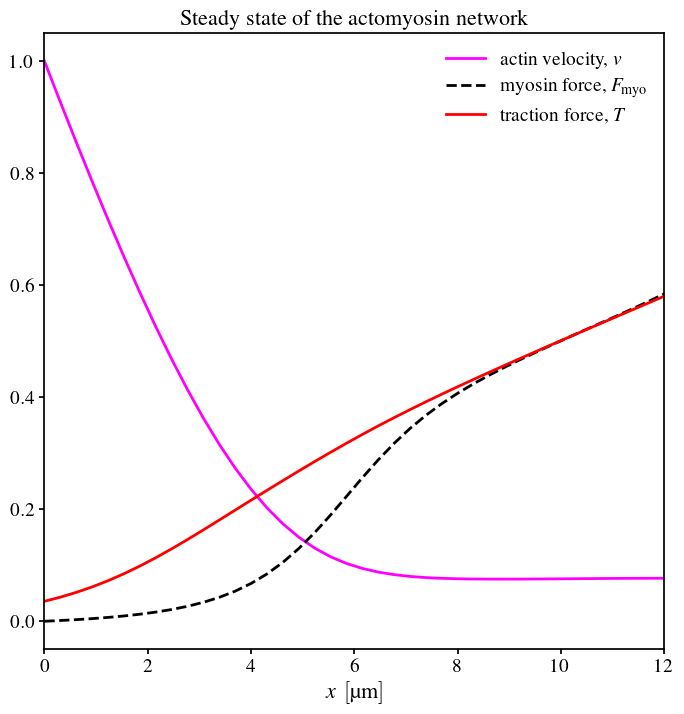

In [4]:
# load data from mat_data object
x_array = np.array(mat_data.get("x"))[0]
v_array = np.array(mat_data.get("v"))[0]
Fmyo_array = np.array(mat_data.get("Fmyo"))[0]
T_array = np.array(mat_data.get("T"))[0]

# make plot using matplotlib
# matlab code to replicate: plot(x, v, 'm', x, Fmyo, 'w--', x, T, 'r', LineWidth=2);
fig, ax = plt.subplots()

# plot points
# plot actin velocity distribution
ax.plot(
    x_array,
    v_array,
    color="magenta",
    linewidth=2,
    label=r"actin velocity, $v$",
)
# plot myosin force distribution
ax.plot(
    x_array,
    Fmyo_array,
    color="black",
    linestyle="--",
    linewidth=2,
    label=r"myosin force, $F_\text{myo}$",
)
# plot actin tension distribution
ax.plot(
    x_array,
    T_array,
    color="red",
    linewidth=2,
    label=r"traction force, $T$",
)

# label axis and title
ax.set_xlabel(r"$x\ \left[\qty{}{\micro\meter}\right]$")
ax.set_ylabel("")
ax.set_title("Steady state of the actomyosin network")

# add a legend
ax.legend()

# save figure
fig.savefig(figure_dir / "steady_state_og")